# Coin Detection Using OpenCV in Python 

**Name  :** KISHORE S
**Reg No:** 212224230130
**Slot  :** 4E6-1

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('CoinsA.png')

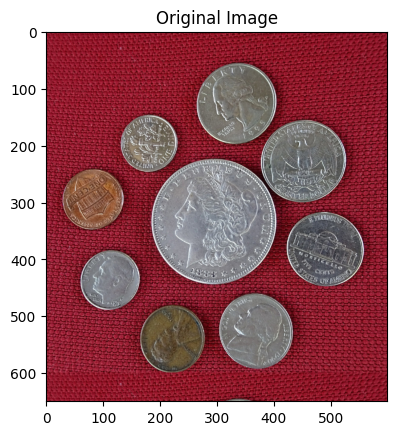

In [3]:
imageCopy = image.copy()
plt.imshow(image[:,:,::-1])
plt.title("Original Image")
plt.show()

In [4]:
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

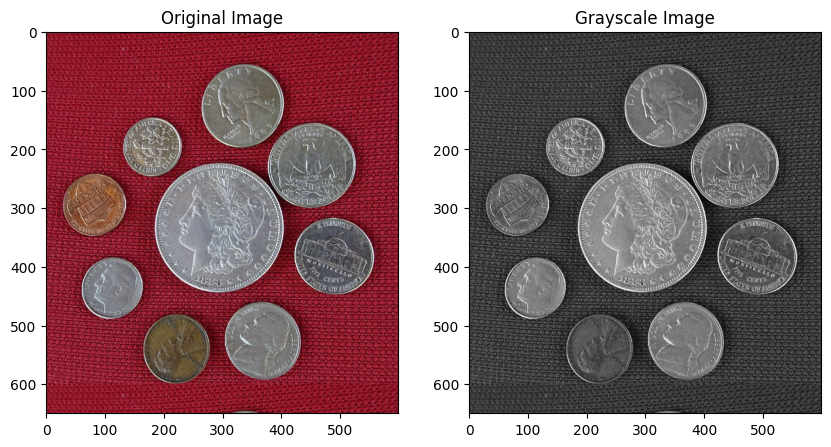

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122); plt.imshow(imageGray,cmap='gray');plt.title("Grayscale Image"); plt.show()

In [6]:
imageB, imageG, imageR = cv2.split(image)

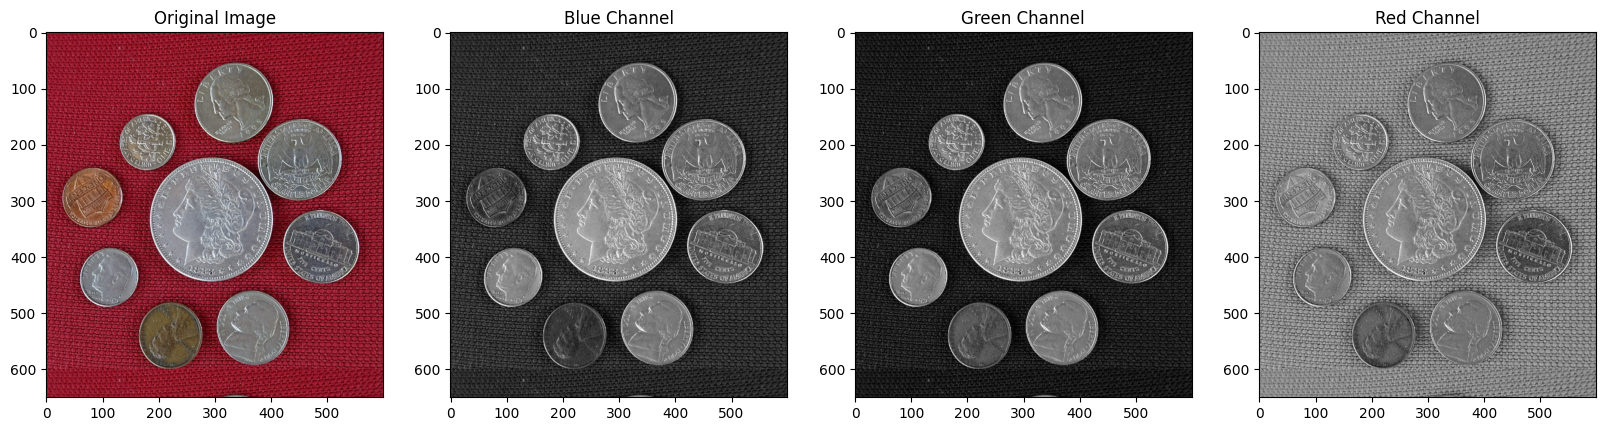

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(imageB,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(imageG,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(imageR,cmap='gray');plt.title("Red Channel");
plt.show()

In [8]:
_, thresh = cv2.threshold(imageG, 80, 255, cv2.THRESH_BINARY)

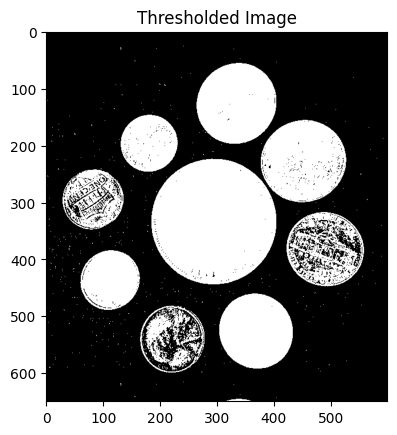

In [9]:
plt.imshow(thresh, cmap='gray');plt.title('Thresholded Image');plt.show()

In [10]:
kernel = np.ones((3, 3), np.uint8)
dilate = cv2.dilate(thresh, kernel, iterations=2)

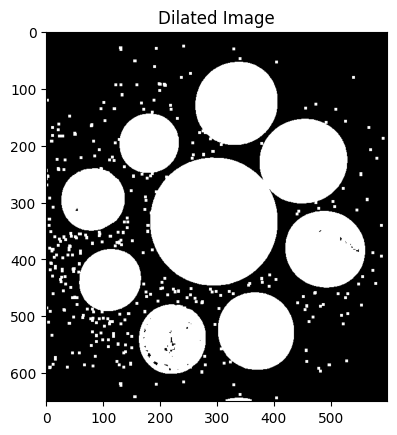

In [11]:
plt.imshow(dilate,cmap='gray')
plt.title("Dilated Image")
plt.show()

In [12]:
kernel1 = np.ones((5, 5), np.uint8)

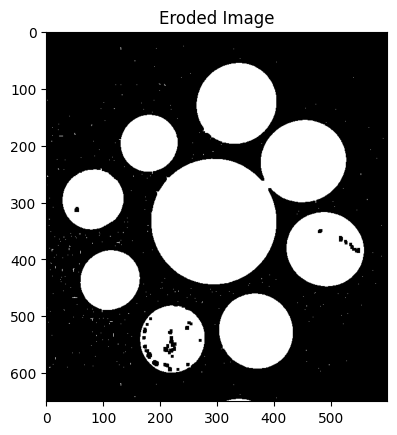

In [13]:
eroded = cv2.erode(dilate, kernel1, iterations=1)
plt.imshow(eroded,cmap='gray')
plt.title("Eroded Image")
plt.show()

In [14]:
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

params.filterByArea = False

params.filterByCircularity = True
params.minCircularity = 0.8

params.filterByConvexity = True
params.minConvexity = 0.8

params.filterByInertia =True
params.minInertiaRatio = 0.8

In [15]:
detector = cv2.SimpleBlobDetector_create(params)

In [16]:
keypoints = detector.detect(eroded)

In [17]:
num_coins = len(keypoints)
print(f"Number of coins detected: {num_coins}")

Number of coins detected: 9
